# Council Expenses for the City of Winnipeg

In [197]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [198]:
df = pd.read_csv(".../input/Council_Member_Expenses.csv")

In [199]:
df.head(20)

,Ward ID,Ward/Office,Council Member,Journal Date,Vendor,Expense Type,Description,Account,Amount
0,0,Mayor's Office,Sam Katz,01/11/2014,City of Winnipeg - Journal Entry,Mayor's Expenses,Salary & Benefits,Payroll,-29719.60
1,0,Mayor's Office,Brian Bowman,04/02/2017,City of Winnipeg - Journal Entry,Mayor's Expenses,Salary & Benefits,Payroll,-25473.77
2,0,Mayor's Office,Sam Katz,03/05/2014,City of Winnipeg - Journal Entry,Mayor's Expenses,Salary & Benefits,Payroll,-23198.40
3,0,Mayor's Office,Sam Katz,04/10/2014,City of Winnipeg - Journal Entry,Mayor's Expenses,Salary & Benefits,Payroll,-20804.14
4,0,Mayor's Office,Brian Bowman,04/03/2017,City of Winnipeg - Journal Entry,Mayor's Expenses,Salary & Benefits,Payroll,-18275.64
5,0,Mayor's Office,Sam Katz,05/04/2014,City of Winnipeg - Journal Entry,Mayor's Expenses,Salary & Benefits,Payroll,-17850.18
6,0,Mayor's Office,Sam Katz,30/04/2014,City of Winnipeg - Journal Entry,Mayor's Expenses,"Reallocated Payroll Costs For Mckenize, Ken (E...",Salaries-Permanent,-17849.77
7,0,Mayor's Office,Brian Bowman,01/12/2018,City of Winnipeg - Payroll,Mayor's Expenses,Salary & Benefits,Payroll,-17695.20
8,0,Mayor's Office,Brian Bowman,07/01/2017,City of Winnipeg - Journal Entry,Mayor's Expenses,Salary & Benefits,Payroll,-17591.65
9,0,Mayor's Office,Brian Bowman,10/12/2016,City of Winnipeg - Journal Entry,Mayor's Expenses,Salary & Benefits,Payroll,-16366.59


In [200]:
short = df.iloc[:1000]

In [201]:
council = df.groupby(["Council Member"]).count()
council

,Ward ID,Ward/Office,Journal Date,Vendor,Expense Type,Description,Account,Amount
Council Member,,,,,,,,
Brian Bowman,2600,2600,2600,2600,2600,2599,2600,2600
Brian Mayes,1268,1268,1268,1268,844,1268,1268,1268
Cindy Gilroy,765,765,765,765,559,765,765,765
Daniel Vandal,150,150,150,150,0,150,150,150
Devi Sharma,1373,1373,1373,1373,906,1373,1373,1373
Grant Nordman,143,143,143,143,0,143,143,143
Harvey Smith,171,171,171,171,0,171,171,171
Janice Lukes,720,720,720,720,565,720,720,720
Jason Schreyer,541,541,541,541,417,541,541,541


Let's look at the number of transactions that have occured. I'm doing this using the groupby and count methods

In [202]:
account_group = df.groupby(["Account"]).count()
account_group.head(10)

,Ward ID,Ward/Office,Council Member,Journal Date,Vendor,Expense Type,Description,Amount
Account,,,,,,,,
Advertising,1710,1710,1710,1710,1710,1042,1710,1710
Aircraft Hire,1,1,1,1,1,0,1,1
Allocated Departmental Costs,59,59,59,59,59,59,59,59
Ambulance/Hospital Coverage,36,36,36,36,36,36,36,36
Atlases and Maps,1,1,1,1,1,1,1,1
Auto Allowance,5,5,5,5,5,2,5,5
Blue Ribbon,1,1,1,1,1,0,1,1
Books,9,9,9,9,9,3,9,9
Business Meetings,966,966,966,966,966,539,966,966


Next let's sort the resulting account_group variable in descending order and look at the first 50.

In [203]:
account_sort = account_group.sort_values(['Amount'], ascending=[False])
account_sort.head(50)

,Ward ID,Ward/Office,Council Member,Journal Date,Vendor,Expense Type,Description,Amount
Account,,,,,,,,
Telephone,2073,2073,2073,2073,2073,1219,2073,2073
Casual Services,1874,1874,1874,1874,1874,1842,1874,1874
Advertising,1710,1710,1710,1710,1710,1042,1710,1710
Non-Professional Services,1430,1430,1430,1430,1430,299,1430,1430
"Luncheons, Receptions & Events",1149,1149,1149,1149,1149,778,1149,1149
"Printing,Binding,Photocopying",1104,1104,1104,1104,1104,740,1104,1104
Stationery and Office Supplies,976,976,976,976,976,716,976,976
Business Meetings,966,966,966,966,966,539,966,966
Protocol,750,750,750,750,750,750,750,750


Let's get a total of the number of overall transactions to find a precentage that each takes up.

In [204]:
acc_sum = account_sort.sum(axis=0)
acc_sum

Ward ID           18914
Ward/Office       18914
Council Member    18914
Journal Date      18914
Vendor            18914
Expense Type      12698
Description       18913
Amount            18914
dtype: int64

Let's find the percentage of occurrence

In [216]:
account_sort['Percent'] = account_sort['Amount']/account_sort['Amount'].sum()*100
account_sort.head(19)

,Ward ID,Ward/Office,Council Member,Journal Date,Vendor,Expense Type,Description,Amount,Percent
Account,,,,,,,,,
Telephone,2073,2073,2073,2073,2073,1219,2073,2073,10.960135
Casual Services,1874,1874,1874,1874,1874,1842,1874,1874,9.908005
Advertising,1710,1710,1710,1710,1710,1042,1710,1710,9.040922
Non-Professional Services,1430,1430,1430,1430,1430,299,1430,1430,7.560537
"Luncheons, Receptions & Events",1149,1149,1149,1149,1149,778,1149,1149,6.074865
"Printing,Binding,Photocopying",1104,1104,1104,1104,1104,740,1104,1104,5.836946
Stationery and Office Supplies,976,976,976,976,976,716,976,976,5.160199
Business Meetings,966,966,966,966,966,539,966,966,5.107328
Protocol,750,750,750,750,750,750,750,750,3.965317


Total occurrence

In [206]:
account_sort.sum()

Ward ID           18914.0
Ward/Office       18914.0
Council Member    18914.0
Journal Date      18914.0
Vendor            18914.0
Expense Type      12698.0
Description       18913.0
Amount            18914.0
Percent             100.0
dtype: float64

Occurrences of less >1%

In [207]:
account_other = account_sort[18:].sum()
account_other

Ward ID           2559.000000
Ward/Office       2559.000000
Council Member    2559.000000
Journal Date      2559.000000
Vendor            2559.000000
Expense Type      1864.000000
Description       2558.000000
Amount            2559.000000
Percent             13.529661
dtype: float64

In [208]:
more_than_one_percent = account_sort[:18].sum()
more_than_one_percent

Ward ID           16355.000000
Ward/Office       16355.000000
Council Member    16355.000000
Journal Date      16355.000000
Vendor            16355.000000
Expense Type      10834.000000
Description       16355.000000
Amount            16355.000000
Percent              86.470339
dtype: float64

In [209]:
acc = account_sort.head(18)
acc

,Ward ID,Ward/Office,Council Member,Journal Date,Vendor,Expense Type,Description,Amount,Percent
Account,,,,,,,,,
Telephone,2073,2073,2073,2073,2073,1219,2073,2073,10.960135
Casual Services,1874,1874,1874,1874,1874,1842,1874,1874,9.908005
Advertising,1710,1710,1710,1710,1710,1042,1710,1710,9.040922
Non-Professional Services,1430,1430,1430,1430,1430,299,1430,1430,7.560537
"Luncheons, Receptions & Events",1149,1149,1149,1149,1149,778,1149,1149,6.074865
"Printing,Binding,Photocopying",1104,1104,1104,1104,1104,740,1104,1104,5.836946
Stationery and Office Supplies,976,976,976,976,976,716,976,976,5.160199
Business Meetings,966,966,966,966,966,539,966,966,5.107328
Protocol,750,750,750,750,750,750,750,750,3.965317


Creating the dataframe plot_df for plotting purposes. 

In [210]:
plot_df = account_sort.head(18)

Using the account_other information I take the transpose of this series and create a location 'Other' with all the values from the series.

In [211]:
plot_df.loc['Other'] = account_other.transpose()

C:\Users\ZAP-DS\Anaconda3\envs\tf15\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [212]:
plot_df

,Ward ID,Ward/Office,Council Member,Journal Date,Vendor,Expense Type,Description,Amount,Percent
Account,,,,,,,,,
Telephone,2073.0,2073.0,2073.0,2073.0,2073.0,1219.0,2073.0,2073.0,10.960135
Casual Services,1874.0,1874.0,1874.0,1874.0,1874.0,1842.0,1874.0,1874.0,9.908005
Advertising,1710.0,1710.0,1710.0,1710.0,1710.0,1042.0,1710.0,1710.0,9.040922
Non-Professional Services,1430.0,1430.0,1430.0,1430.0,1430.0,299.0,1430.0,1430.0,7.560537
"Luncheons, Receptions & Events",1149.0,1149.0,1149.0,1149.0,1149.0,778.0,1149.0,1149.0,6.074865
"Printing,Binding,Photocopying",1104.0,1104.0,1104.0,1104.0,1104.0,740.0,1104.0,1104.0,5.836946
Stationery and Office Supplies,976.0,976.0,976.0,976.0,976.0,716.0,976.0,976.0,5.160199
Business Meetings,966.0,966.0,966.0,966.0,966.0,539.0,966.0,966.0,5.107328
Protocol,750.0,750.0,750.0,750.0,750.0,750.0,750.0,750.0,3.965317


Let's go a plottin!!

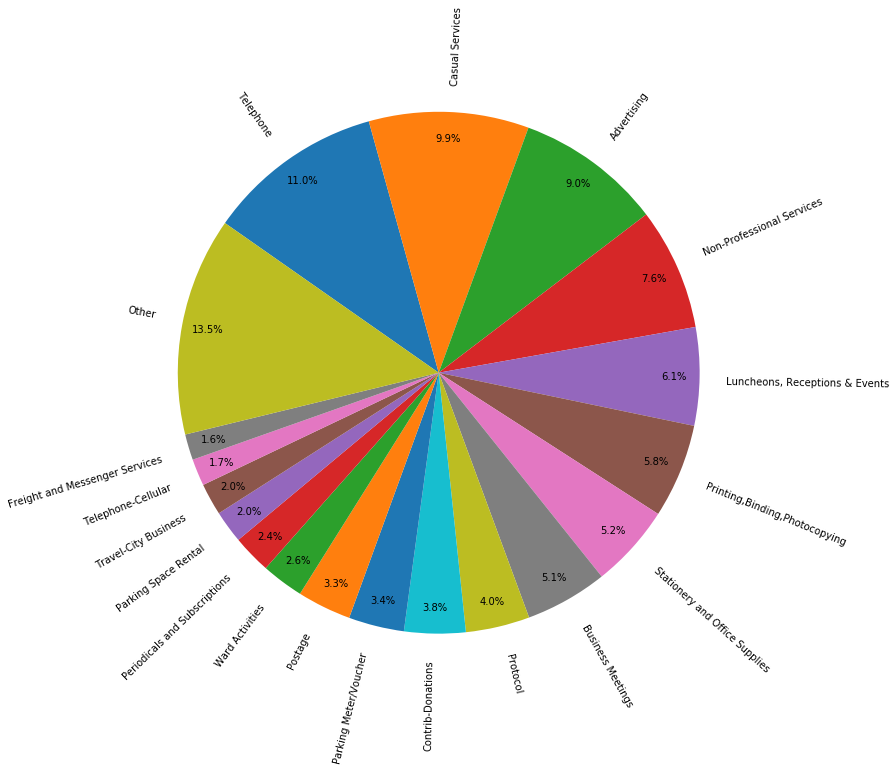

In [217]:
labels = plot_df.index.values
plt.pie(plot_df['Percent'], autopct='%1.1f%%', pctdistance=0.9, startangle=145, radius=3, counterclock=False, 
        labels=labels, labeldistance=1.1, rotatelabels=True)
#plt.legend(test_df.index.values, loc="lower left")
#plt.axis('equal')
#plt.tight_layout()
plt.show()

From the pie chart above 13.5% of council expense claims had individual labeled accounts occurring less than one percent  of the time. This equates to just over 2500 entries. The rest of the accounts with more than 1% occurrence accounted for over 18900 entries with Telephone leading with 2073 entries.